#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [9]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline
import zipfile

In [10]:
#Extract the zip file
with zipfile.ZipFile('car_evaluation.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

# Load and concatenate data
file_names = ['car_evaluation_0.csv', 'car_evaluation_1.csv', 'car_evaluation_2.csv','car_evaluation_3.csv']  # The file names of the zip folder
data = [pd.read_csv(f'extracted_folder/{name}') for name in file_names]

# Concatenate dataframes
df = pd.concat(data, ignore_index=True)
df.head(5)


,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [11]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [12]:
print(df['decision'].value_counts())

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

# Split the data into features (X) and target variable (y)
X = df.drop('decision', axis=1)
y = df['decision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(1381, 6)
(346, 6)
(1381,)
(346,)


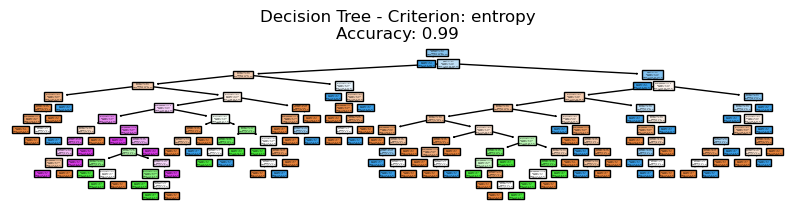

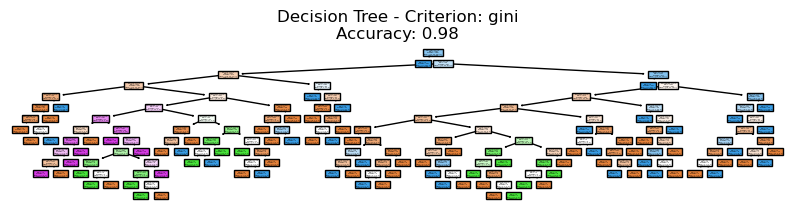

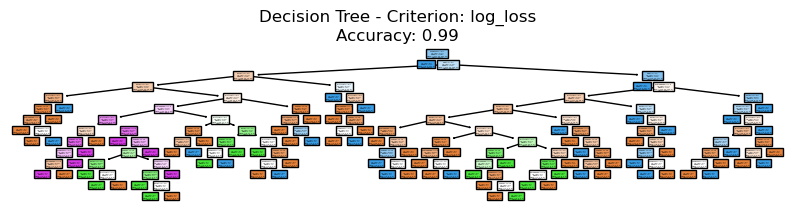

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

def train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion):
    clf = DecisionTreeClassifier(criterion=criterion, random_state=40)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return clf, accuracy

# evaluation with different criteria
criteria = ['entropy', 'gini', 'log_loss']
models = {}

for criterion in criteria:
    model, accuracy = train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion)
    models[criterion] = {'model': model, 'accuracy': accuracy}

# Visualize the decision trees
for criterion, model_info in models.items():
    plt.figure(figsize=(10, 2))
    plot_tree(model_info['model'], filled=True, feature_names=list(X.columns), class_names=list(y.unique()))
    plt.title(f'Decision Tree - Criterion: {criterion}\nAccuracy: {model_info["accuracy"]:.2f}')
    plt.show()



In [7]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


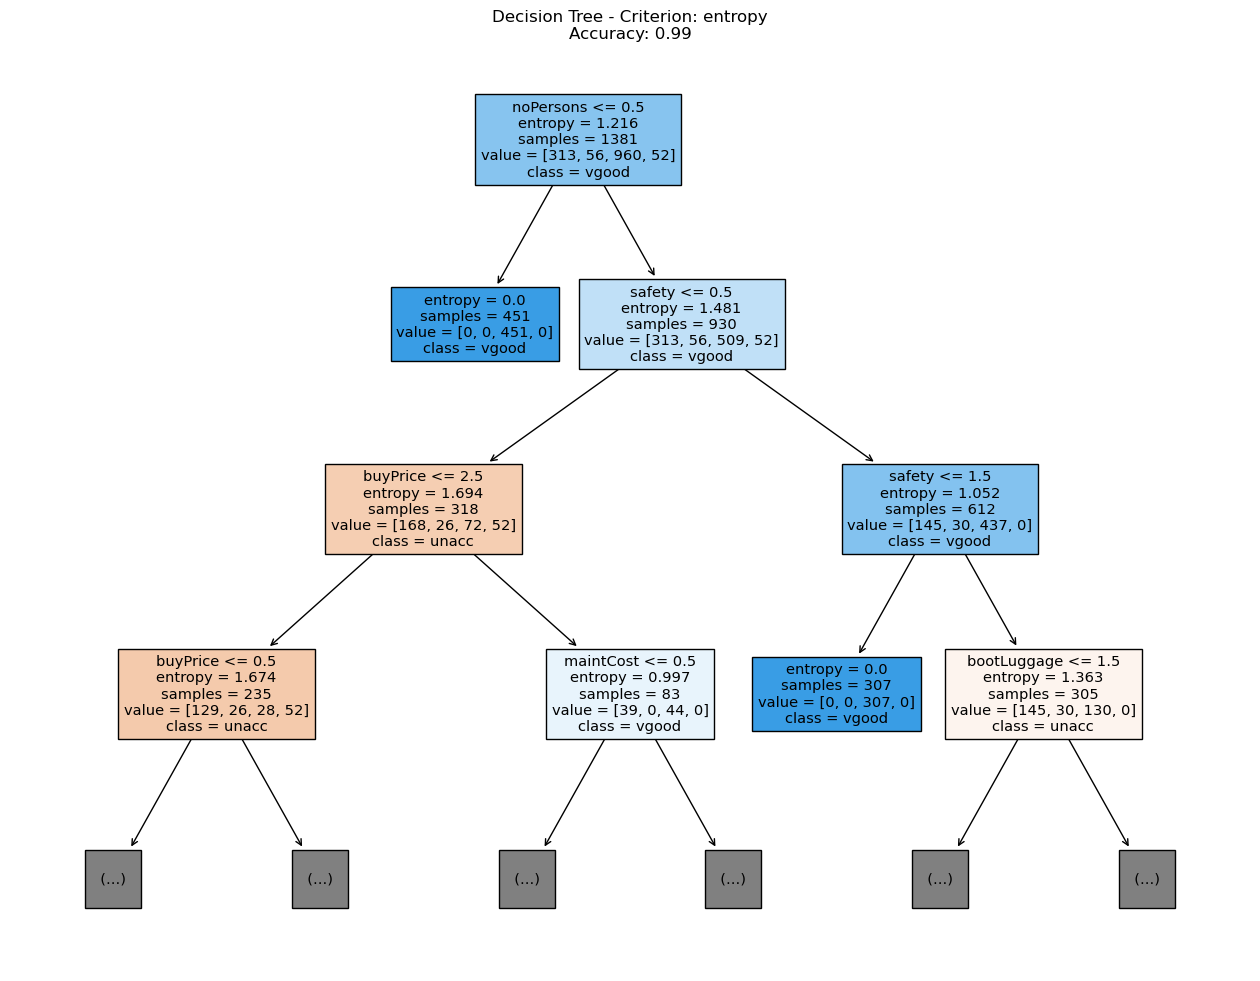

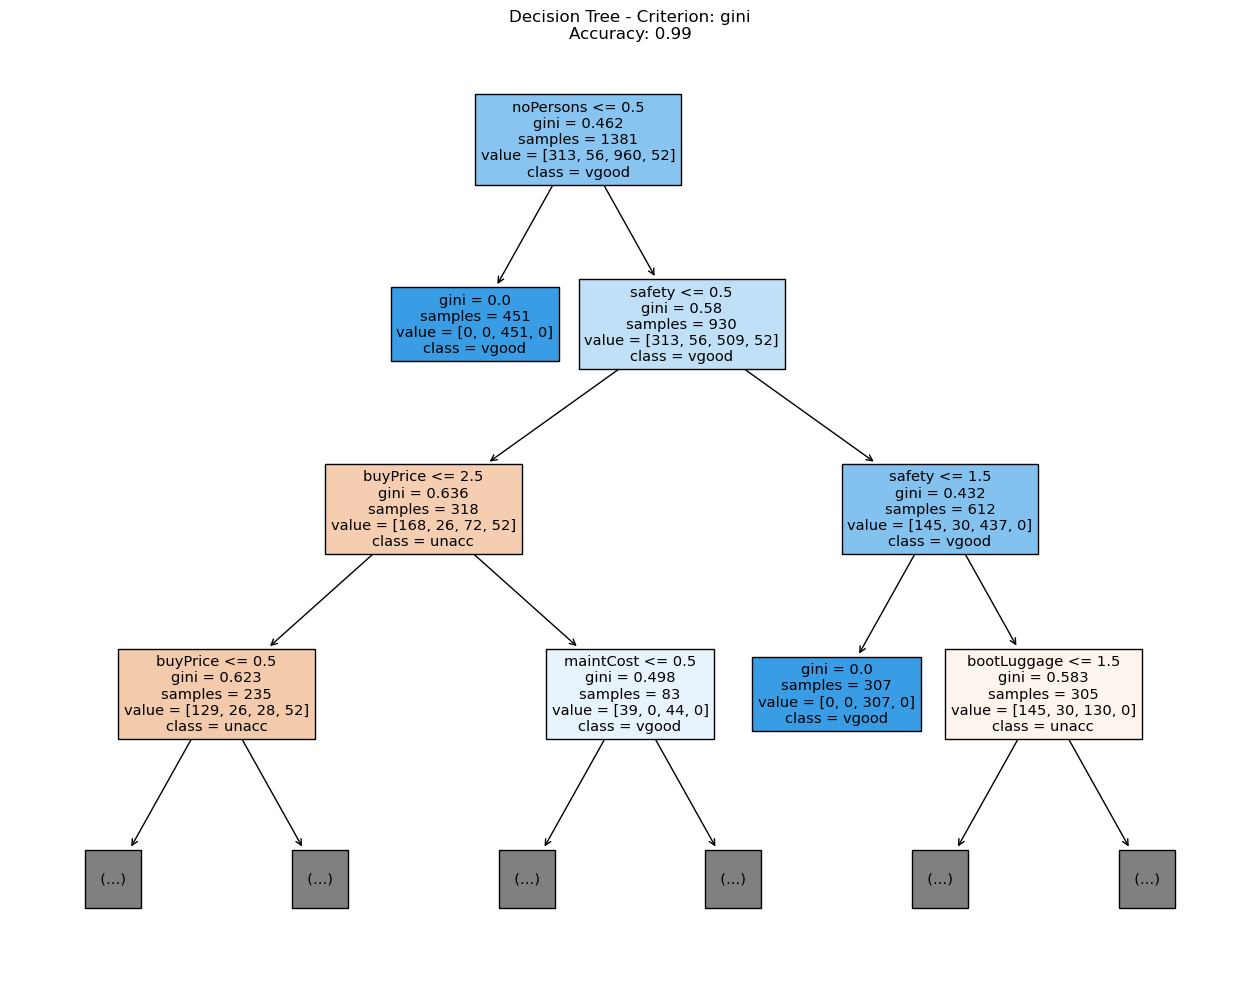

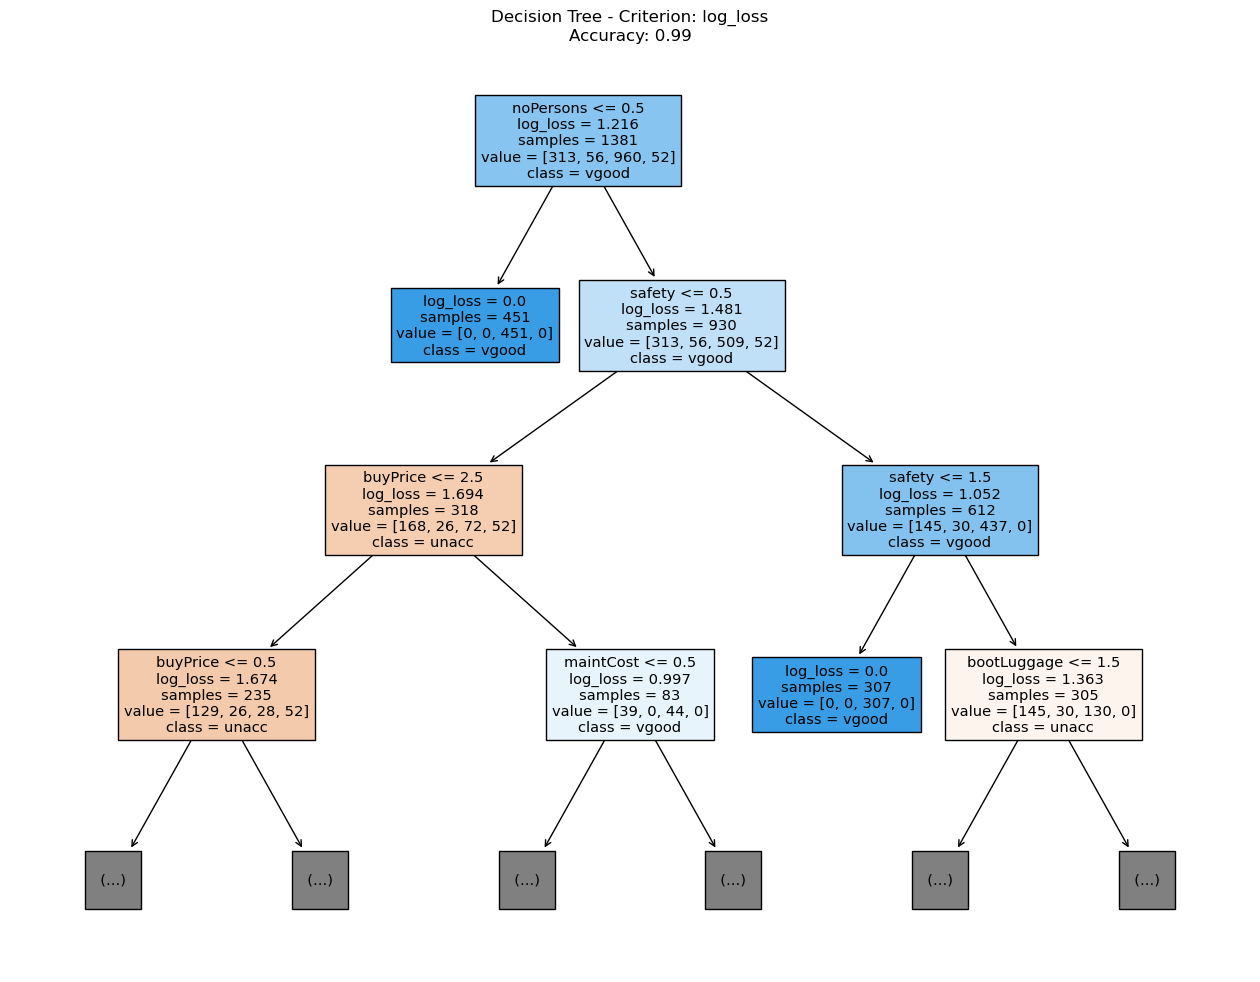

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion):
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return clf, accuracy

# Train and evaluate decision trees with different criteria
criteria = ['entropy', 'gini', 'log_loss']
models = {}

for criterion in criteria:
    model, accuracy = train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion)
    models[criterion] = {'model': model, 'accuracy': accuracy}

# Visualize the decision trees
for criterion, model_info in models.items():
    plt.figure(figsize=(16, 12))
    plt.rcParams.update({'font.size': 10})
    plot_tree(model_info['model'], filled=True, feature_names=list(X.columns), class_names=list(y.unique()), max_depth=3)
    plt.title(f'Decision Tree - Criterion: {criterion}\nAccuracy: {model_info["accuracy"]:.2f}')
    plt.show()


In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################